In [1]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
import pandas as pd
 

# Method for Feature Selection

In [2]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


In [ ]:
## Loading the eintire data

In [4]:
panCancer_train_df = pd.read_csv('../../D2GNets/data/panCancer_train_CGC_657_DR_Drug_features_new_df.csv')
GBM_train_df = pd.read_csv('../../D2GNets/data/GBM_train_CGC_657_DR_Drug_features_new_df.csv')

In [5]:
# Loading the Drug, Disease, and Gene Feature names
Disease_Xcols = (pd.read_csv('../../D2GNets/data/diseaseNames.csv')).columns.tolist()
GE_Xcols =  (pd.read_csv('../../D2GNets/data/657_Gene_name.csv')).columns.tolist()+Disease_Xcols
Drug_Xcols =  (pd.read_csv('../../D2GNets/data/moleculeNames_v1.csv')).columns.tolist()

# Preparing the Pancancer data
panCancer_df = pd.concat([panCancer_train_df,GBM_train_df],axis=0)
#Selecting trainable features, Target columns, and TCGA acronym of cancers types
panCancer_df = panCancer_df[Drug_Xcols+GE_Xcols+['TCGA_DESC','LN_IC50']]
#dropping samples with missing values
panCancer_df.dropna(inplace=True)



In [6]:

X = panCancer_df[Drug_Xcols+GE_Xcols]# Data
y = panCancer_df['LN_IC50'] # traget labels

In [7]:
# Preparing the data for modeling for Model selection score
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


# Performing feature selection

In [8]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

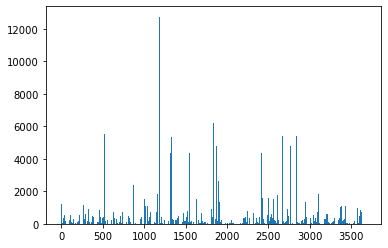

In [9]:
# Plotting the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Saving the Feature Based Scores

In [10]:
features_scores_df = pd.DataFrame()

In [11]:
features_scores_df['Name'] = Drug_Xcols+GE_Xcols

In [12]:
features_scores_df['Score'] = fs.scores_

In [14]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def scoreClass(score):
    if score!=None:
        if (score>=0.0 and score<10.0):
            return 'class1'
        elif score>=10.0 and score<20.0:
            return 'class2'
        elif score>=20.0 and score<30.0:
            return 'class3'
        elif score>=30.0 and score<40.0:
            return 'class4'
        elif score>=40.0 and score<50.0:
            return 'class5'
        elif score>=50.0 and score<60.0:
            return 'class6'
        elif score>=60.0 and score<80.0:
            return 'class7'
        elif score>=80.0 and score<100.0:
            return 'class8'
        elif score>=100.0 and score<150.0:
            return 'class9'
        elif score>=150.0 and score<300.0:
            return 'class10'
        elif score>=300.0 and score<500.0:
            return 'class11'
        elif score>=500.0 and score<1500.0:
            return 'class12'
        else:
            return 'class13'
    else:
        return None

In [15]:
features_scores_df['ScoreClass'] = features_scores_df.apply(lambda x: scoreClass(x['Score']), axis=1)

In [16]:
features_scores_df

,Name,Score,ScoreClass
0,mol1,1715.351348,class13
1,mol2,3860.742917,class13
2,mol3,1225.187773,class12
3,mol4,1368.360777,class12
4,mol5,482.477252,class11
...,...,...,...
3669,SKCM,5.536203,class1
3670,STAD,0.029842,class1
3671,THCA,34.218241,class4
3672,UCEC,26.779809,class3


In [17]:
features_scores_df.dtypes

Name           object
Score         float64
ScoreClass     object
dtype: object

In [18]:
(features_scores_df)['ScoreClass'].value_counts()

class12    646
class10    564
class1     516
class11    508
class13    305
class2     232
class9     210
class8     162
class7     148
class4     130
class3     106
class5      79
class6      68
Name: ScoreClass, dtype: int64

In [20]:
# saving the DataFrame
features_scores_df.to_csv('../../D2GNets/supplementary_material/featureScore.csv',index=False)